In [40]:
import os
from NaiveBayesDF import NaiveBayes
import random
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

# Preprocessing

Women’s Clothing E-Commerce dataset is a real commercial data from [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews). It revolves around the reviews written by customers and includes 9  variables. 

In [41]:
df_clothing = pd.read_csv('clothing_reviews.csv')
df_clothing.drop('Unnamed: 0',axis=1).head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


To conduct a sentiment analysis, I transform the dataset to a form that is easier to analyze. In the Ratingvariable, there are 5 labels, including 1, 2, 3, 4, and 5,  To conduct a binary classification, I transform 1 and 2 into  negative . 4 and 5 represent  positive . (The rest of values represent  neutral , but we don't need this class in this case. I instead replace it with nan ) 

In [42]:
# Prepare data for training
tone_dict = {1:'neg', 2:'neg', 3:np.nan, 4:'pos', 5:'pos'}
df_clothing['Rating'] = df_clothing['Rating'].map(tone_dict)
df_clothing['Rating'].head()

0    pos
1    pos
2    NaN
3    pos
4    pos
Name: Rating, dtype: object

Besides, I concentrate on tops products in this case. Our purpose is to conduct sentiment analysis, so I just need the Review Textvariable and use the Ratingvariable as sentiment labels. Finally, through dropping missing values and renaming varaible names, our dataset is prepared.

In [43]:
df_clothing = df_clothing.loc[(df_clothing['Department Name'] == 'Tops'), ['Rating', 'Review Text']]
df_clothing = df_clothing.dropna().reset_index(drop=True)
df_clothing.columns = ['tone', 'text']
df_clothing.head()

,tone,text
0,pos,This shirt is very flattering to all due to th...
1,pos,I aded this in my basket at hte last mintue to...
2,pos,"I ordered this in carbon for store pick up, an..."
3,pos,Took a chance on this blouse and so glad i did...
4,pos,"If this product was in petite, i would get the..."


# Exploratory Analysis

In [44]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

cdict = {'pos': '#4dbbaa', 'neg':'#ef846d', 'all':'#2abc5'}
text_cdict = {'neg':'#e45131', 'pos':'#249f8c', 'all':'#008fd5', 'title':'#595959'}

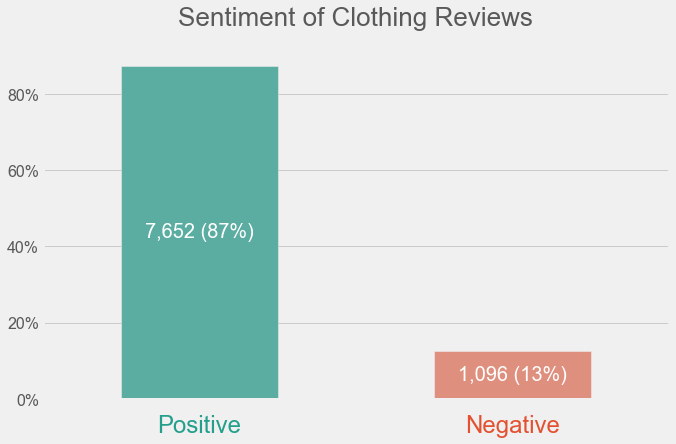

In [45]:
df_by_tone = df_clothing['tone'].value_counts().reset_index().rename({'tone':'count','index':'tone'}, axis=1)
df_by_tone['pct'] = (df_by_tone['count']/df_by_tone['count'].sum()).round(4)


plt.figure(figsize=(10,6))
sns.set(style="white")
style.use('fivethirtyeight')
ax = sns.barplot(x="tone", y="pct", data=df_by_tone, palette=[cdict['pos'], cdict['neg']])
ax.axes.set_title('Sentiment of Clothing Reviews', fontsize=26, y=1.05, color=text_cdict['title'])
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='y', labelcolor=text_cdict['title'])
ax.tick_params(axis='x', pad=15)
ax.set_yticklabels(['{0:.0%}'.format(i) for i in ax.get_yticks()], fontsize=16)
ax.set_xticklabels(['Positive', 'Negative'], fontsize=24)

colors = [text_cdict['pos'], text_cdict['neg']]
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)

change_width(ax, 0.5)
#plt.savefig('sent_count_2.jpg')

for i, row in df_by_tone.iterrows():
    ax.text(i, row['pct']*0.5, '{0:,} ({1:.0%})'.format(row['count'], row['pct']), color='white', ha='center', va='center', fontsize=20)


plt.show()
#plt.savefig('images/Sentiment of Clothing Reviews.png', facecolor='white', bbox_inches="tight", dpi=75)

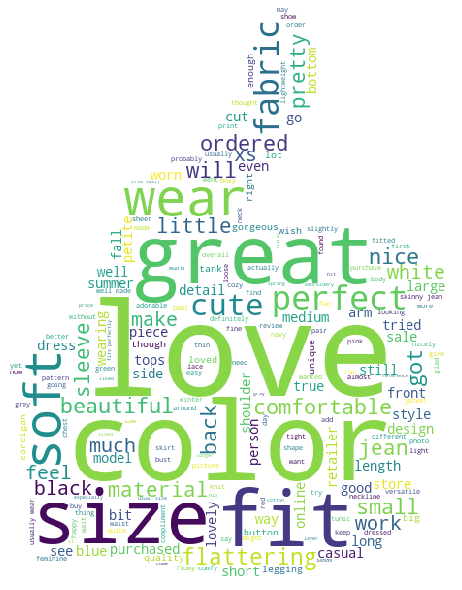

In [46]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import requests
os.chdir('C://Users/wanyu/Documents/Project/sentiment analysis')
# Define function to create wordclouds
def generate_wordcloud(words, mask, colormap):
    word_cloud = WordCloud(width = 2000, height = 2000, background_color='white', 
                           stopwords=my_stopwords, 
                           mask=mask, 
                           colormap=colormap)
    word_cloud = word_cloud.generate(' '.join(words))
    plt.figure(figsize=(10,8), facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
# Define stopwords
my_stopwords = set(STOPWORDS)
my_stopwords.update(['shirt', 'top', 'sweater', 'one', 'blouse', 'tee', 
                     'look', 'looked', 'looks', 'really', 'bought', 'think']) 

# Word colud for positive reviews
pos_text =  df_clothing.text.loc[df_clothing.tone == 'pos']
mask_pos = np.array(Image.open(r"thumbs-up.png"))
generate_wordcloud(pos_text, mask_pos, None)

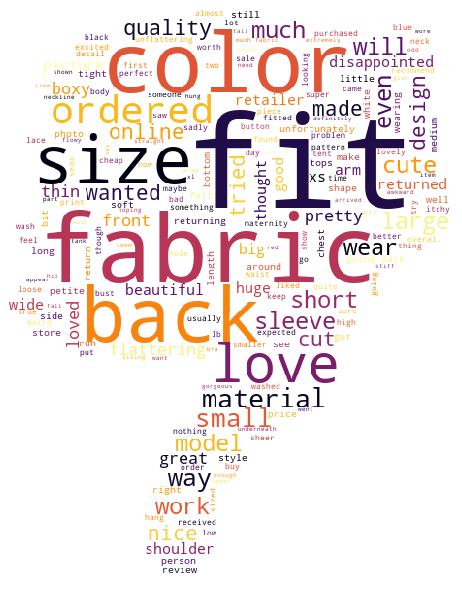

In [47]:
# Word colud for negative reviews
neg_text =  df_clothing.text.loc[df_clothing.tone == 'neg']
mask_neg = np.array(Image.open(r"thumbs-down.png"))
generate_wordcloud(neg_text, mask_neg, matplotlib.cm.inferno)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')

def freq_words(sentences):
    tokenizer = CountVectorizer()
    word_token = tokenizer.fit_transform(sentences)

    word_frequency = (pd.DataFrame(np.squeeze(np.asarray(word_token.sum(axis=0))), 
                                   index=tokenizer
                                   .get_feature_names())
                      .reset_index()
                      .rename({'index':'word', 0:'count'}, axis=1)
                      .sort_values('count'))
    return word_frequency

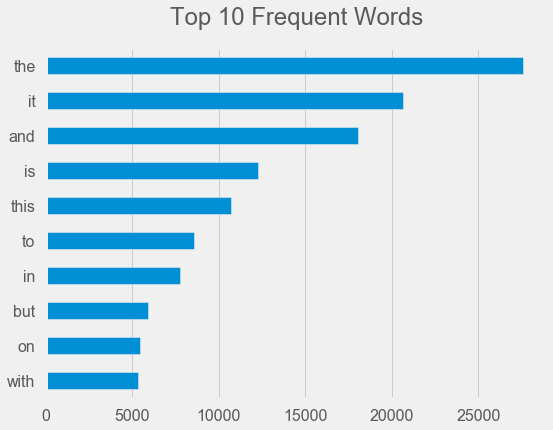

In [49]:
word_frequency_all = freq_words(df_clothing['text'])

fig, ax = plt.subplots(figsize=[8,6])
word_frequency_all.set_index('word').tail(10).plot.barh(ax=ax)
ax.set_ylabel('')
ax.set_title('Top 10 Frequent Words', y=1.05, fontsize=24, color=text_cdict['title'])
ax.legend().remove()

ax.tick_params(axis='both', pad=10, labelsize=16, labelcolor=text_cdict['title'])
ax.grid(False, axis='y')

plt.show()
#plt.savefig('images/Top 10 Frequent Words.png', facecolor='white', bbox_inches="tight", dpi=75)

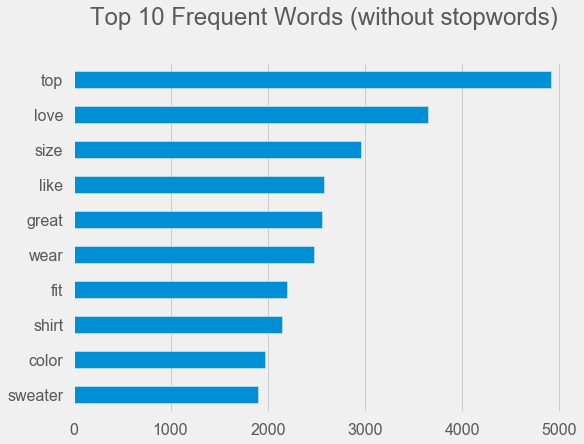

In [50]:
fig, ax = plt.subplots(figsize=[8,6])
word_frequency_all.loc[~word_frequency_all.word.isin(stopword)].set_index('word').tail(10).plot.barh(ax=ax)

ax.set_ylabel('')
ax.set_title('Top 10 Frequent Words (without stopwords)', pad=20, y=1.05, fontsize=24, color=text_cdict['title'])
ax.legend().remove()

ax.tick_params(axis='both', pad=10, labelsize=16, labelcolor=text_cdict['title'])
ax.yaxis.set_tick_params(width=5)
ax.grid(False, axis='y')

plt.show()
#plt.savefig('images/Top 10 Frequent Words (without stopwords).png', facecolor='white', bbox_inches="tight", dpi=75)

In [51]:
word_frequency_pos = freq_words(df_clothing.loc[df_clothing.tone == 'pos', 'text'])
word_frequency_neg = freq_words(df_clothing.loc[df_clothing.tone == 'neg', 'text'])

word_frequency_pos['pct'] = word_frequency_pos['count']/word_frequency_pos['count'].sum()
word_frequency_neg['pct'] = word_frequency_neg['count']/word_frequency_neg['count'].sum()

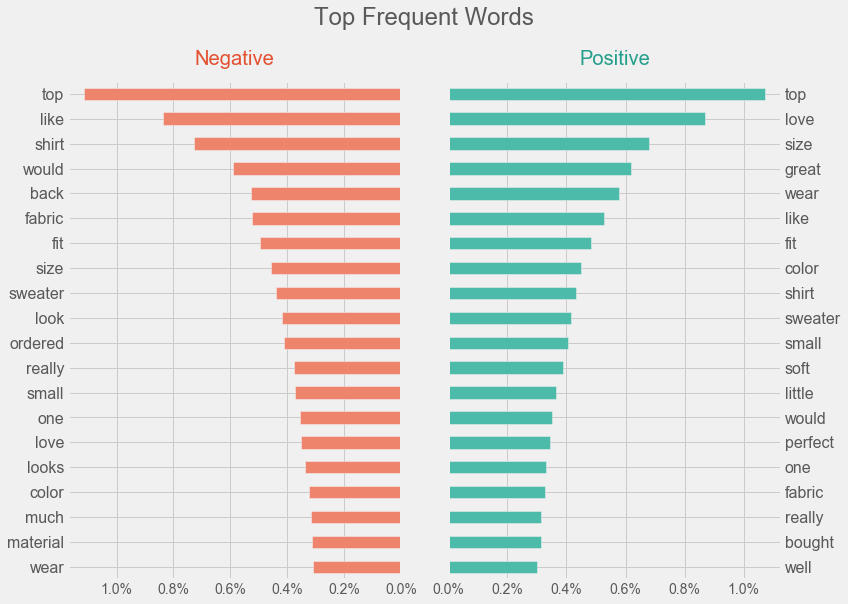

In [52]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=[12,8])
(word_frequency_neg.loc[~word_frequency_neg.word.isin(stopword)].set_index('word')['pct'].tail(20)*-1).plot.barh(ax=ax[0], color=cdict['neg'])
word_frequency_pos.loc[~word_frequency_pos.word.isin(stopword)].set_index('word')['pct'].tail(20).plot.barh(ax=ax[1], color=cdict['pos'])
ax[1].yaxis.tick_right()

for axes in [ax[0], ax[1]]:
    axes.set_ylabel('')
    axes.legend().remove()
    axes.tick_params(axis='both', labelsize=16, labelcolor=text_cdict['title'])

ax[0].set_xticklabels([''] + ['{0:.1%}'.format(i) for i in np.arange(0.01,-0.001,-0.002)], fontsize=14, color=text_cdict['title'])
ax[1].set_xticklabels(['{0:.1%}'.format(i) for i in np.arange(0,0.011,0.002)],  fontsize=14, color=text_cdict['title'])

ax[0].set_title('Negative', y=1.02, color=text_cdict['neg'])
ax[1].set_title('Positive', y=1.02, color=text_cdict['pos'])
#plt.setp(ax[0], xticks=np.arange(0,-4001,-1000), xticklabels=np.arange(0,-4001,-1000)*-1)


    
plt.tight_layout()
plt.suptitle('Top Frequent Words', y=1.05, fontsize=24, color=text_cdict['title'])

plt.show()
#plt.savefig('images/Top Frequent Words (pos vs neg).png', facecolor='white', bbox_inches="tight", dpi=75)

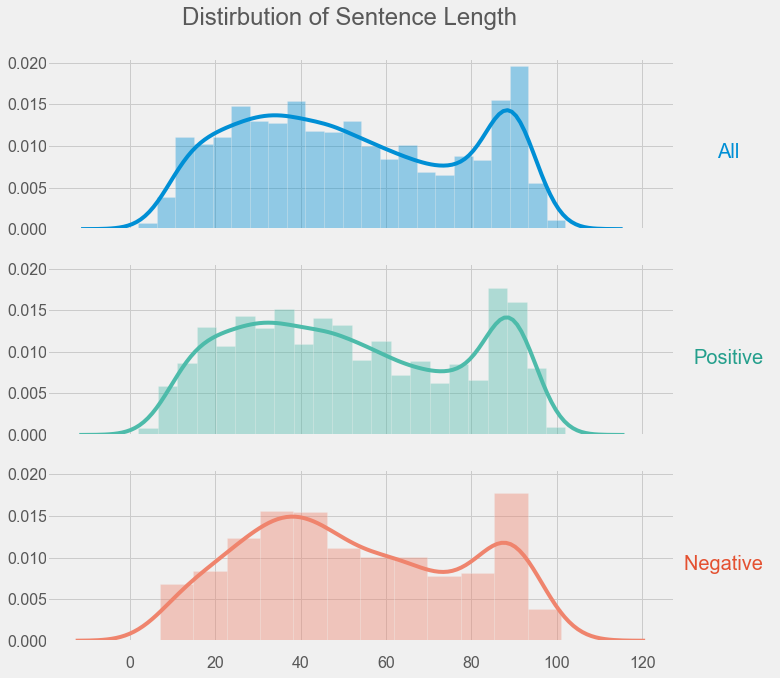

In [53]:
tokenizer = CountVectorizer()
word_token = tokenizer.fit_transform(df_clothing['text'])
sent_length = (pd.DataFrame(np.squeeze(np.asarray(word_token.sum(axis=1))))
                  .rename({'index':'word', 0:'count'}, axis=1)
                  .sort_values('count'))

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=[10,10], sharex=True, sharey=True)

sns.distplot(sent_length, ax=ax[0])
sns.distplot(sent_length.loc[df_clothing.loc[df_clothing.tone == 'pos'].index], ax=ax[1], color='#4dbbaa')
sns.distplot(sent_length.loc[df_clothing.loc[df_clothing.tone == 'neg'].index], ax=ax[2], color='#ef846d')

colors = [text_cdict['all'], text_cdict['pos'], text_cdict['neg']]

for i, label in enumerate(['All', 'Positive', 'Negative  ']):
    ax[i].yaxis.set_label_position("right")
    ax[i].set_ylabel(label, rotation=0, ha='center', labelpad=55, color=colors[i], fontsize=20)
    ax[i].tick_params(axis='y', labelcolor=text_cdict['title'], pad=0, labelsize=16)
    
ax[2].tick_params(axis='x', labelcolor=text_cdict['title'], pad=15, labelsize=16)
    
plt.suptitle('Distirbution of Sentence Length', y=0.95, fontsize=24, color=text_cdict['title'])

plt.show()
#plt.savefig('images/Distirbution of Sentence Length.png', facecolor='white', bbox_inches="tight", dpi=75)

# Training Models

### 1. Splitting dataset
Since the number of reviews in two classes are imbalanced, the results might be influenced and the model might not perform well in classfying negative reviews. Thus, the first thing is to make two classes have the same number of reviews and shuffle indices at the same time.

In [54]:
# Split data into three part: training, development, and testing data
random.seed(123)
pos_idx = list(df_clothing[df_clothing.tone == 'pos'].index)
neg_idx = list(df_clothing[df_clothing.tone == 'neg'].index)
random_pos_idx = random.sample(pos_idx, len(neg_idx))
random_neg_idx = random.sample(neg_idx, len(neg_idx))


Subsequently,  I split 70% of data as a training set, 15% as a development set (or called a validation set), and the rest 15% as a testing set.

In [55]:
# Assign positive and negative index to different sets
point_1 = int(len(random_pos_idx)*0.7)
point_2 = int(len(random_pos_idx)*0.85)

train_idx = random_pos_idx[0:point_1] + random_neg_idx[0:point_1]
dev_idx = random_pos_idx[point_1:point_2] + random_neg_idx[point_1:point_2]
test_idx = random_pos_idx[point_2:] + random_neg_idx[point_2:]

# Split data into three part: training, development, and testing data
train = df_clothing.iloc[train_idx]
dev = df_clothing.iloc[dev_idx]
test = df_clothing.iloc[test_idx]

### 2. Preparing data for trainning
Before starting to building the model, I import the Naive Bayes algorithm I built before and other needed packages. Then, I call NaiveBayes() and pass dataframes into saving the training data and the development data into the function.  The function .get_train_data() will tokenize text data into a set of words and compute some numbers we need in the later process.  

In [61]:
random.seed(88)
nb = NaiveBayes(train, dev)
nb.get_train_data('tone', 'text')

In this algorithm, I have to establish a set of words used to determine a review is positive or negative. By using potential_features(),  the function will rank words according to the Likelihood Ratio (LR) and reutrn a list of candidate featues. Here I set num_f=180 to require it to return top 180 features.

In [62]:
features = nb.potential_features(num_f=180)

### 3. Training the model
Now, we can start to train the model. The simplest way is to use all candidate features in our model. However, is it necessary to include all of them? In fact, some features might not have significant influence on our prediction. Thus, here I will use `select_features()` function to train the model and filter out unimportant features. 

In the function, I choose a `backward` method and a `random_select` mode, that means the model begins with all the features selected and randomly removes one feature at each step. Through setting metric as `'Accuracy'` , the model will select features based on the value of accuracy rate. If accuracy becomes better, it will keep the feature; otherwise, drops it.  Additionally, by specifying `min_features=50 `, the training process will stop if the number of final features is less than 20. 

In [63]:
feature_dict, evaluation = nb.select_features(feature_list = features, 
                                              random_select=True, 
                                              min_features = 20, 
                                              method='backward')

------- The Number of Final Features -------

53

------- Features with the Best Performance -------

comfortable, worn, wonderful, cheap, highly, drapes, pants, looked, works, started, money, returned, gives, dry, years, detail, weird, sent, hole, idea, paired, nicely, nothing, made, going, run, arrived, swimming, huge, best, returning, put, wanted, warm, wide, poor, anyone, easy, belly, hung, disappointed, excited, expected, above, should, jeans, unflattering, hopes, little, true, favorite, product, soft

------- The Best Performance of the Model -------

      Accuracy Precision Recall     F1
Class                                 
pos      0.863     0.832  0.909  0.869
neg      0.863     0.899  0.817  0.856


The model finally chooses **5 features** for classification. The results look pretty good. The accuracy rate achieves 0.857, which means the model can accurately predict 85.3% reviews and classify them into correct classes.

### 4. Applying the model on the testing set
After building the classification model, it's time to apply the model on the testing set. The accuracy rate is 75.5% It's a little bit overfitting, but still have a good result. 

In [64]:
nb.test_df = test
test_results = nb.test()
evaluation = nb.evaluate(test_results)
evaluation

,Accuracy,Precision,Recall,F1
Class,,,,
pos,0.758,0.714,0.861,0.781
neg,0.758,0.824,0.655,0.73


In [81]:
feature_tone.head().style.set_table_attributes('style="font-size: 17px"')

,pos,neg,pos_neg,neg_pos,tone
comfortable,0.001615,0.000263,6.133570,0.163037,pos
worn,0.001184,0.000263,4.497951,0.222323,pos
wonderful,0.000242,0.000026,9.200355,0.108691,pos
cheap,0.000027,0.000685,0.039318,25.433800,neg
highly,0.000808,0.000026,30.667851,0.032607,pos


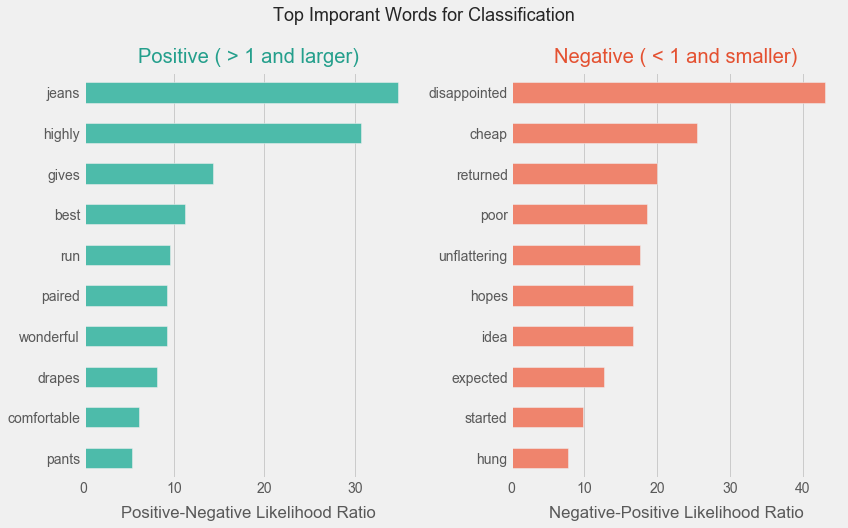

In [83]:
plt.style.use('fivethirtyeight')
feature_tone = nb.feature_ratio.loc[feature_dict]
feature_tone['tone'] = (feature_tone['pos_neg']
                      .apply(lambda x: 'pos' if x > 1 else 'neg')
                      .sort_values()) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 7])

feature_tone.loc[feature_tone.tone == 'pos', 'pos_neg'].sort_values().tail(10).plot.barh(color=cdict['pos'], ax=ax[0])
ax[0].set_title('Positive ( > 1 and larger)', y=1.01, color=text_cdict['pos'])
ax[0].set_xlabel('Positive-Negative Likelihood Ratio', labelpad=10, color=text_cdict['title'])


feature_tone.loc[feature_tone.tone == 'neg', 'neg_pos'].sort_values().tail(10).plot.barh(color=cdict['neg'], ax=ax[1])
ax[1].set_title('Negative ( < 1 and smaller)', y=1.01, color=text_cdict['neg'])
ax[1].set_xlabel('Negative-Positive Likelihood Ratio', labelpad=10, color=text_cdict['title'])



for axes in [ax[0], ax[1]]:
    axes.grid(False, axis='y')
    axes.tick_params(axis='both', labelsize=14, labelcolor=text_cdict['title'])

plt.suptitle('Top Imporant Words for Classification', y=1.05, fontsize=18)
plt.tight_layout()

#plt.show()
plt.savefig('C://Users/wanyu/Documents/GitHub/data_science_projects/nlp/sentiment analysis/images/Top Imporant Words for Classification.png', facecolor='white', bbox_inches="tight", dpi=75)